# Global LL Glance: SST noise

In [1]:
# imports
from importlib import reload

import os # a module to interact with the operating system
os.environ["ENDPOINT_URL"]="http://rook-ceph-rgw-nautiluss3.rook"
import numpy as np

import pandas as pd
import xarray
import h5py
import random
import healpy as hp

import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

from matplotlib import pyplot as plt
import seaborn as sns

from ulmo import io as ulmo_io
from ulmo import plotting
from ulmo.llc import io as llc_io
from ulmo.llc import plotting as llc_plotting

from ulmo.utils import image_utils
from ulmo.analysis import figures as ulmo_figs
from ulmo.plotting import plotting as ulmo_plotting

In [2]:
os.getenv('ENDPOINT_URL') 
tbl_file = 's3://llc/Tables/test_modis2012.parquet'
llc_table = ulmo_io.load_main_table(tbl_file)
new_tbl_file = 's3://modis-l2/Tables/MODIS_L2_std.parquet'
mod_table = ulmo_io.load_main_table(new_tbl_file)

Read main table: s3://llc/Tables/test_modis2012.parquet
Read main table: s3://modis-l2/Tables/MODIS_L2_std.parquet


In [3]:
tbl_file1 = 's3://llc/Tables/LLC_modis_noise.parquet'
llc_table1 = ulmo_io.load_main_table(tbl_file1)

Read main table: s3://llc/Tables/LLC_modis_noise.parquet


In [4]:
mod_table['DT'] = mod_table.T90 - mod_table.T10
mod_table['DT_abs'] = mod_table.Tmax - mod_table.Tmin

In [5]:
year_2012 = mod_table[(mod_table.datetime >= pd.to_datetime('2012-01-01 00:00:00')) & (mod_table.datetime < pd.to_datetime('2012-11-15 11:35:00'))]

# LL histogram

#### Plot

(0.0, 14000.0)

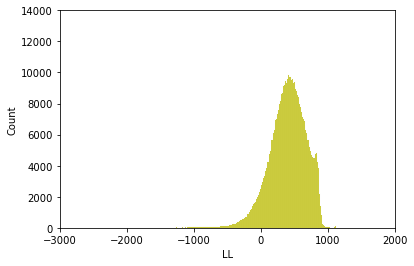

In [6]:
ax = sns.histplot(data= llc_table1, x = 'LL', color = 'y', stat = 'count', label = 'LLC - noise', binwidth = 10)
#ax = sns.histplot(data= LL1, color = 'g', stat = 'count', label = 'LLC')
ax.set_xlim(-3000., 2000.)
ax.set_ylim(0., 14000)

(0.0, 14000.0)

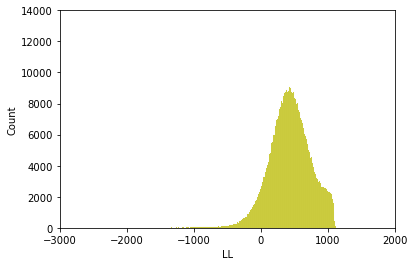

In [7]:
ax = sns.histplot(data= llc_table, x='LL', color = 'y', stat = 'count', label = 'LLC', binwidth = 10)
ax.set_xlim(-3000., 2000.)
ax.set_ylim(0., 14000)

(0.0, 14000.0)

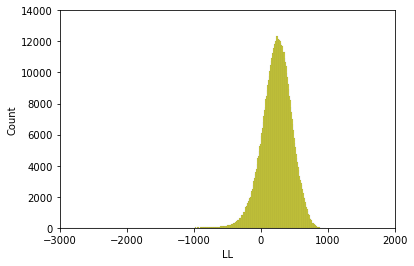

In [8]:
ax = sns.histplot(data= year_2012, x='LL', color = 'y', stat = 'count', label = 'Modis', binwidth = 10)
ax.set_xlim(-3000., 2000.)
ax.set_ylim(0., 14000)

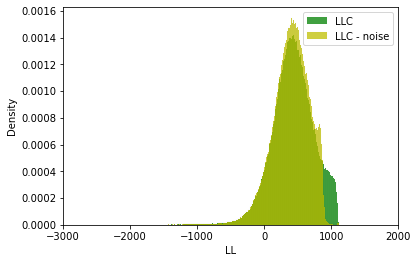

In [13]:
ax = sns.histplot(data= llc_table, x='LL', color = 'g', stat = 'density', label = 'LLC ', binwidth = 10)
ax = sns.histplot(data= llc_table1, x='LL', color = 'y', stat = 'density', label = 'LLC - noise', binwidth = 10)
#ax = sns.histplot(data= year_2012, x='LL', color = 'b', stat = 'count', label = 'Modis')
ax.set_xlim(-3000., 2000.)
#ax.set_ylim(0., 14000)
ax.legend()

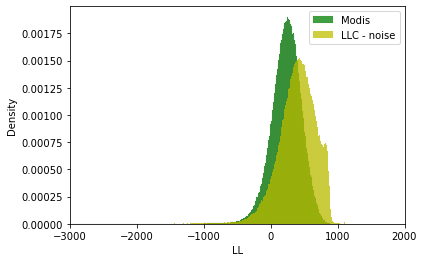

In [11]:
ax = sns.histplot(data= year_2012, x='LL', color = 'g', stat = 'density', label = 'Modis', binwidth = 10)
ax = sns.histplot(data= llc_table1, x='LL', color = 'y', stat = 'density', label = 'LLC - noise', binwidth = 10)
#ax = sns.histplot(data= llc_table, x='LL', color = 'g', stat = 'count', label = 'LLC')
ax.set_xlim(-3000., 2000.)
#ax.set_ylim(0., 14000)
ax.legend()

In [40]:
year_2012.shape[0]

647744

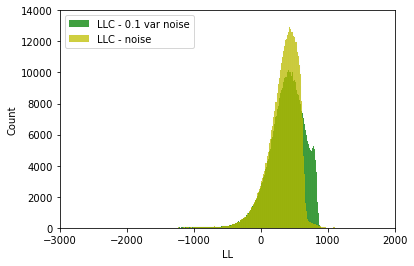

In [72]:
ax = sns.histplot(data= llc_table1, x='LL', color = 'g', stat = 'count', label = 'LLC - 0.1 var noise', binwidth = 10)
ax = sns.histplot(data= llc_table, x='LL_SST', color = 'y', stat = 'count', label = 'LLC - noise', binwidth = 10)
#ax = sns.histplot(data= llc_table, x='LL', color = 'g', stat = 'count', label = 'LLC')
ax.set_xlim(-3000., 2000.)
ax.set_ylim(0., 14000)
ax.legend()

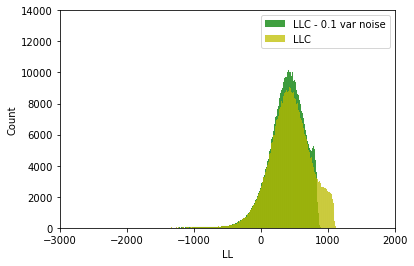

In [74]:
ax = sns.histplot(data= llc_table1, x='LL', color = 'g', stat = 'count', label = 'LLC - 0.1 var noise', binwidth = 10)
ax = sns.histplot(data= llc_table, x='LL', color = 'y', stat = 'count', label = 'LLC', binwidth = 10)
#ax = sns.histplot(data= llc_table, x='LL', color = 'g', stat = 'count', label = 'LLC')
ax.set_xlim(-3000., 2000.)
ax.set_ylim(0., 14000)
ax.legend()

# Outliers

In [34]:
#low LL
LL99 = np.percentile(llc_table.LL.to_numpy(), 99.9)
LL1 = np.percentile(llc_table.LL.to_numpy(), 0.1)

LL99_SST = np.percentile(llc_table.LL_SST.to_numpy(), 99.9)
LL1_SST = np.percentile(llc_table.LL_SST.to_numpy(), 0.1)

lowLL_LLC = llc_table[llc_table.LL < LL1]

lowLL_SST = llc_table[llc_table.LL_SST < LL1_SST]

#high LL
highLL_LLC = llc_table[llc_table.LL > LL99]

highLL_SST = llc_table[llc_table.LL_SST > LL99_SST]

In [35]:
print('99th percentile- no noise: {} and 99th percentile -SST noise: {}'.format(LL99, LL99_SST))

99th percentile- no noise: 1094.996382812502 and 99th percentile -SST noise: 891.3274826660233


In [36]:
print('1st percentile- no noise: {} and 1st percentile -SST noise: {}'.format(LL1, LL1_SST))

1st percentile- no noise: -1844.7878881835936 and 1st percentile -SST noise: -1846.9472622070311


#### Histogram of Bottom 1%

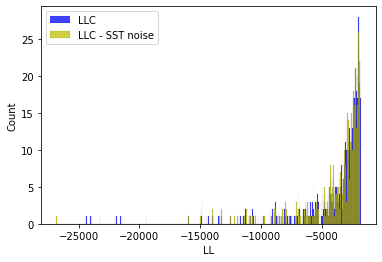

In [37]:
ax = sns.histplot(data= lowLL_LLC, x='LL', color = 'b', stat = 'count', label = 'LLC', binwidth = 50)
ax = sns.histplot(data= lowLL_SST, x='LL_SST', color = 'y', stat = 'count', label = 'LLC - SST noise', binwidth = 50)


#ax.set_xlim(-3000., 2000.)
#ax.set_ylim(0., 14000)
ax.legend()

In [111]:
np.mean(lowLL_LLC.LL.values)

-3987.1187

In [112]:
np.mean(lowLL_SST.LL_SST.values)

-3955.7524

# Spatial Distribution: One by One

In [38]:
from ulmo.analysis import spatial_plots as sp

#### LLC (no noise)

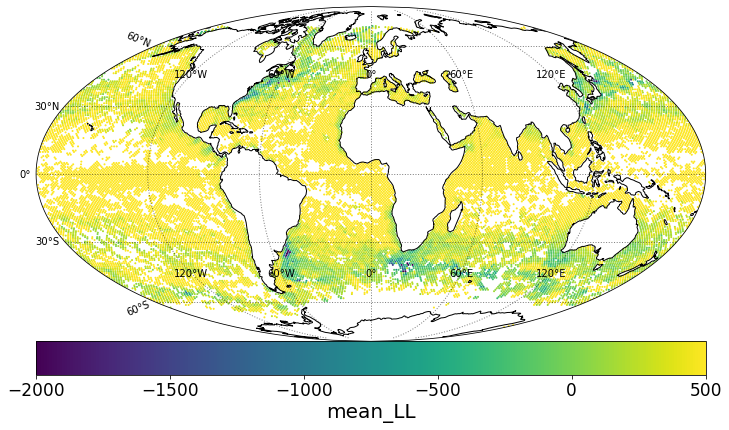

In [94]:
_ = sp.show_avg_LL(llc_table, lbl = True)

#### LLC (var 0.1 noise)

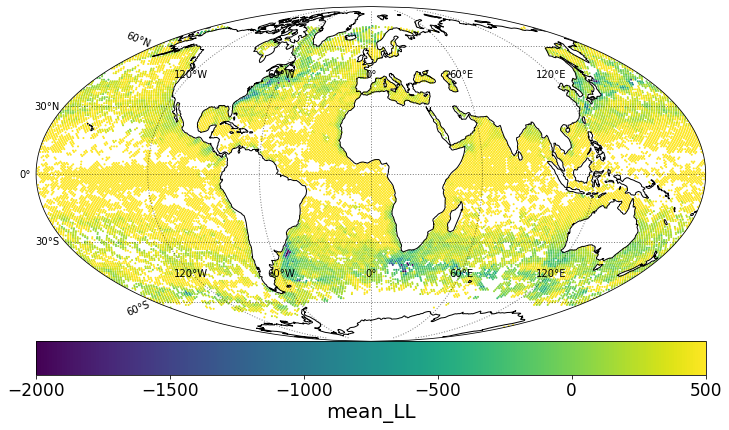

In [95]:
_ = sp.show_avg_LL(llc_table1, lbl = True)

#### LLC (SST noise)

In [96]:
def evals_to_healpix(eval_tbl, nside, lbl = True, mask=True):
    """
    Generate a healpix map of where the input
    MHW Systems are located on the globe

    Parameters
    ----------
    mhw_sys : pandas.DataFrame
    nside : int  # nside is a number that sets the resolution of map
    mask : bool, optional

    Returns
    -------
    healpix_array : hp.ma (number of cutouts)
    lats : np.ndarray
    lons : np.ndarray
    healpix_array : hp.ma (average LL)

    """
    # Grab lats, lons
    lats = eval_tbl.lat.values
    lons = eval_tbl.lon.values

    # Grab LL values
    vals = eval_tbl.LL_SST.values

    # Healpix coords
    theta = (90 - lats) * np.pi / 180. 
    phi = lons * np.pi / 180.
    idx_all = hp.pixelfunc.ang2pix(nside, theta, phi) 

    # Count events
    npix_hp = hp.nside2npix(nside)
    all_events = np.ma.masked_array(np.zeros(npix_hp, dtype='int')) 
    all_values = np.ma.masked_array(np.zeros(npix_hp, dtype='int')) 

    for i, idx in enumerate(idx_all):
        all_events[idx] += 1
        all_values[idx] += vals[i] 

    zero = all_events == 0 
    
    float_events = all_events.astype(float)
    float_values = all_values.astype(float)
    float_values[~zero] = all_values[~zero]/all_events[~zero]


    # Mask
    hpma = hp.ma(float_events)
    hpma1 = hp.ma(float_values)
    if mask:  # if you want to mask float_events
        hpma.mask = zero # current mask set to zero array, where Trues (no events) are masked
        hpma1.mask = zero 

    # Angles
    hp_lons, hp_lats = hp.pixelfunc.pix2ang(nside, np.arange(npix_hp), lonlat=True)

    # Return
    return hpma, hp_lons, hp_lats, hpma1


In [99]:
def show_avg_LL(main_tbl:pd.DataFrame, 
                 nside=64, 
                 use_mask=True, tricontour=False,
                 lbl=None, figsize=(12,8), 
                 color='viridis', show=True):
    """Generate a global map of the location of the input
    cutouts

    Args:
        main_tbl (pandas.DataFrame): table of cutouts
        nside (int, optional): [description]. Defaults to 64.
        use_log (bool, optional): [description]. Defaults to True.
        use_mask (bool, optional): [description]. Defaults to True.
        tricontour (bool, optional): [description]. Defaults to False.
        lbl ([type], optional): [description]. Defaults to None.
        figsize (tuple, optional): [description]. Defaults to (12,8).
        color (str, optional): [description]. Defaults to 'Reds'.
        show (bool, optional): If True, show on the screen.  Defaults to True

    Returns:
        matplotlib.Axis: axis holding the plot
    """
    # Healpix me
    hp_events, hp_lons, hp_lats, hp_values = evals_to_healpix(
        main_tbl, nside, mask=use_mask)
    
    # Figure
    
    fig = plt.figure(figsize=figsize)
    plt.clf()

    tformM = ccrs.Mollweide()
    tformP = ccrs.PlateCarree()

    ax = plt.axes(projection=tformM)

    if tricontour:
        cm = plt.get_cmap(color)
        img = ax.tricontourf(hp_lons, hp_lats, hp_values, transform=tformM,
                         levels=20, cmap=cm)#, zorder=10)
    else:
        cm = plt.get_cmap(color)
        # Cut
        good = np.invert(hp_values.mask)
        img = plt.scatter(x=hp_lons[good],
            y=hp_lats[good],
            c=hp_values[good], vmin = -2000, vmax = 500,
            cmap=cm,
            s=1,
            transform=tformP)

    # Colorbar
    cb = plt.colorbar(img, orientation='horizontal', pad=0.)
    if lbl is not None:
        clbl = 'mean_LL'
        cb.set_label(clbl, fontsize=20.)
    cb.ax.tick_params(labelsize=17)

    # Coast lines
    if not tricontour:
        ax.coastlines(zorder=10)
        ax.set_global()
    
        gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1, 
            color='black', alpha=0.5, linestyle=':', draw_labels=True)
        gl.xlabels_top = False
        gl.ylabels_left = True
        gl.ylabels_right=False
        gl.xlines = True
        gl.xformatter = LONGITUDE_FORMATTER
        gl.yformatter = LATITUDE_FORMATTER
        gl.xlabel_style = {'color': 'black'}# 'weight': 'bold'}
        gl.ylabel_style = {'color': 'black'}# 'weight': 'bold'}
        #gl.xlocator = mticker.FixedLocator([-180., -160, -140, -120, -60, -20.])
        #gl.xlocator = mticker.FixedLocator([-240., -180., -120, -65, -60, -55, 0, 60, 120.])
        #gl.ylocator = mticker.FixedLocator([0., 15., 30., 45, 60.])


    # Layout and save
    if show:
        plt.show()

    return ax

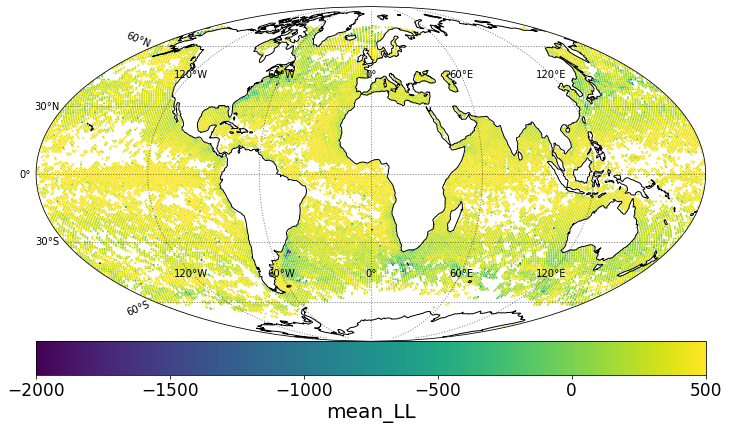

<GeoAxesSubplot:>

In [100]:
show_avg_LL(llc_table, lbl = True)

#### MODIS

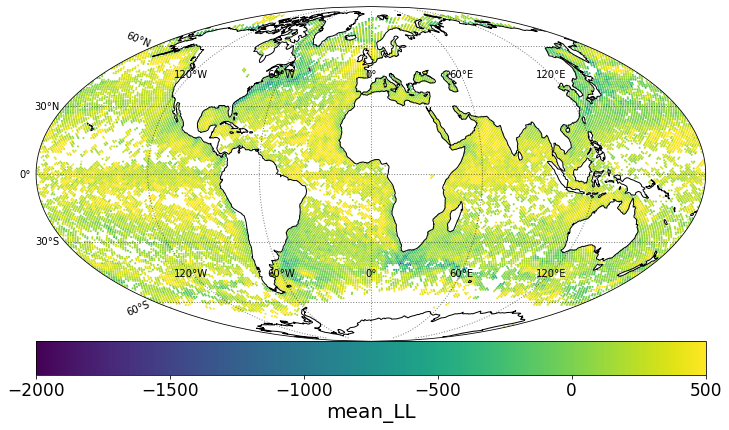

In [93]:
_ = sp.show_avg_LL(year_2012, lbl = True)

# What's wrong with avg LL in SST noise data?

## Check out low LL

In [101]:
#low LL

lowLL_LLC = llc_table[llc_table.LL < -500]
lowLL_SST = llc_table[llc_table.LL_SST < -500]


#### Mean and std dev of low LL distribtuion

In [102]:
print('Mean: {} and std: {} for no noise LLC'.format( np.mean(lowLL_LLC.LL.values), np.std(lowLL_LLC.LL.values)))

Mean: -1272.8914794921875 and std: 1633.0770263671875 for no noise LLC


In [103]:
print('Mean: {} and std: {} for SST noise LLC'.format( np.mean(lowLL_SST.LL_SST.values), np.std(lowLL_SST.LL_SST.values)))

Mean: -1264.867431640625 and std: 1578.12548828125 for SST noise LLC


#### Number of values below LL = -500

In [104]:
print('no noise: {} and SST noise: {} '.format( lowLL_LLC.shape[0], lowLL_SST.shape[0]))

no noise: 4723 and SST noise: 4713 


#### Spatial Distribution: Log(concentration)

In [105]:
def show_spatial(main_tbl:pd.DataFrame, 
                 nside=64, use_log=True, 
                 use_mask=True, tricontour=False,
                 lbl=None, figsize=(12,8), 
                 color='Reds', show=True):
    """Generate a global map of the location of the input
    cutouts

    Args:
        main_tbl (pandas.DataFrame): table of cutouts
        nside (int, optional): [description]. Defaults to 64.
        use_log (bool, optional): [description]. Defaults to True.
        use_mask (bool, optional): [description]. Defaults to True.
        tricontour (bool, optional): [description]. Defaults to False.
        lbl ([type], optional): [description]. Defaults to None.
        figsize (tuple, optional): [description]. Defaults to (12,8).
        color (str, optional): [description]. Defaults to 'Reds'.
        show (bool, optional): If True, show on the screen.  Defaults to True

    Returns:
        matplotlib.Axis: axis holding the plot
    """
    # Healpix me
    hp_events, hp_lons, hp_lats = image_utils.evals_to_healpix(
        main_tbl, nside, log=False, mask=use_mask)
    
    # Figure
    
    fig = plt.figure(figsize=figsize)
    plt.clf()

    tformM = ccrs.Mollweide()
    tformP = ccrs.PlateCarree()

    ax = plt.axes(projection=tformM)

    if tricontour:
        cm = plt.get_cmap(color)
        img = ax.tricontourf(hp_lons, hp_lats, hp_events, transform=tformM,
                         levels=20, cmap=cm)#, zorder=10)
    else:
        cm = plt.get_cmap(color)
        # Cut
        good = np.invert(hp_events.mask)
        img = plt.scatter(x=hp_lons[good],
            y=hp_lats[good],
            c=hp_events[good], 
            cmap=cm,
            s=1,
            transform=tformP)

    # Colorbar
    cb = plt.colorbar(img, orientation='horizontal', pad=0.)
    if lbl is not None:
        clbl=r'$\log_{10} \, N_{\rm '+'{}'.format(lbl)+'}$'
        cb.set_label(clbl, fontsize=20.)
    cb.ax.tick_params(labelsize=17)

    # Coast lines
    if not tricontour:
        ax.coastlines(zorder=10)
        ax.set_global()
    
        gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1, 
            color='black', alpha=0.5, linestyle=':', draw_labels=True)
        gl.xlabels_top = False
        gl.ylabels_left = True
        gl.ylabels_right=False
        gl.xlines = True
        gl.xformatter = LONGITUDE_FORMATTER
        gl.yformatter = LATITUDE_FORMATTER
        gl.xlabel_style = {'color': 'black'}# 'weight': 'bold'}
        gl.ylabel_style = {'color': 'black'}# 'weight': 'bold'}
        #gl.xlocator = mticker.FixedLocator([-180., -160, -140, -120, -60, -20.])
        #gl.xlocator = mticker.FixedLocator([-240., -180., -120, -65, -60, -55, 0, 60, 120.])
        #gl.ylocator = mticker.FixedLocator([0., 15., 30., 45, 60.])


    # Layout and save
    if show:
        plt.show()

    return ax

/opt/conda/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:324: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/opt/conda/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:348: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/opt/conda/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:360: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


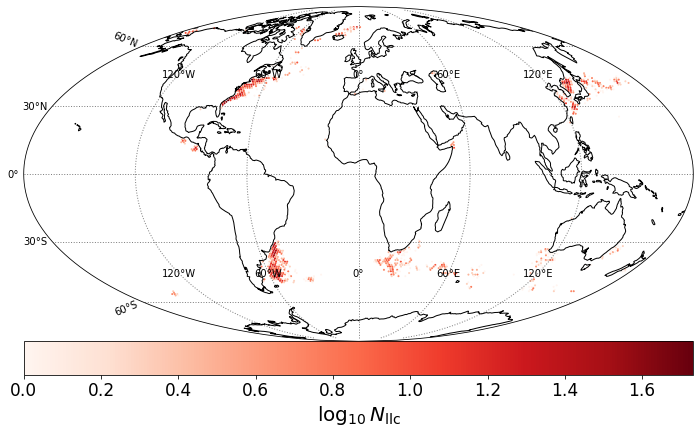

In [106]:
_ = ulmo_figs.show_spatial(lowLL_LLC, lbl = 'llc')

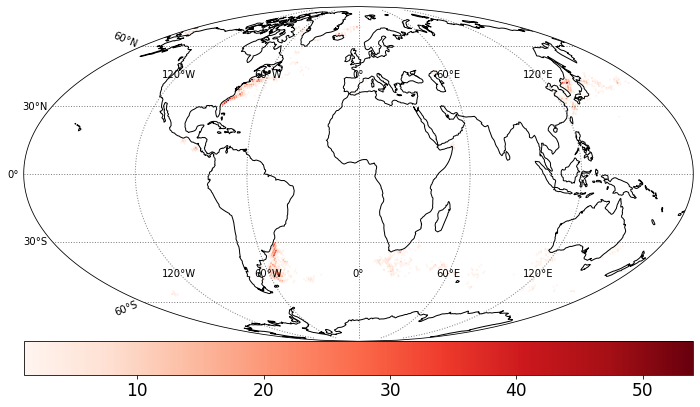

<GeoAxesSubplot:>

In [51]:
show_spatial(lowLL_LLC)

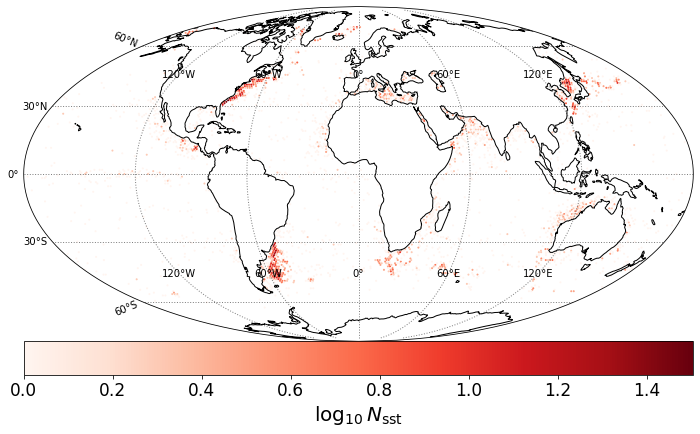

In [109]:
_ = ulmo_figs.show_spatial(lowLL_SST, lbl = 'sst')

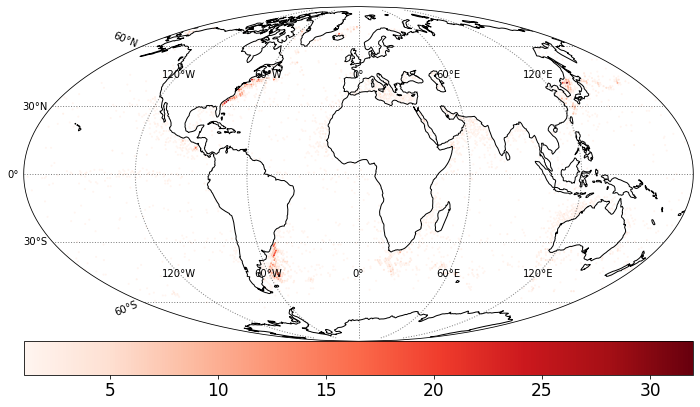

<GeoAxesSubplot:>

In [110]:
show_spatial(lowLL_SST)

## Check out high LL

In [111]:
#high LL

highLL_LLC = llc_table[llc_table.LL > 500]
highLL_SST = llc_table[llc_table.LL_SST > 500]

#### Mean and std dev of low LL distribtuion

In [112]:
print('Mean: {} and std: {} for no noise LLC'.format( np.mean(highLL_LLC.LL.values), np.std(highLL_LLC.LL.values)))

Mean: 718.8432006835938 and std: 161.59957885742188 for no noise LLC


In [113]:
print('Mean: {} and std: {} for SST noise LLC'.format( np.mean(highLL_SST.LL_SST.values), np.std(highLL_SST.LL_SST.values)))

Mean: 576.956298828125 and std: 62.824989318847656 for SST noise LLC


#### Number of values above LL = 500

In [114]:
print('no noise: {} and SST noise: {} '.format( highLL_LLC.shape[0], highLL_SST.shape[0]))

no noise: 259750 and SST noise: 155868 


#### Histogram

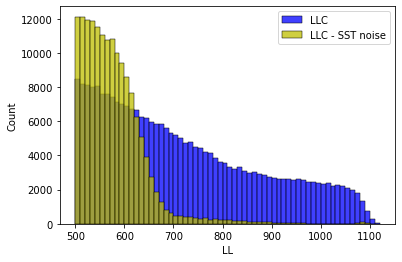

In [115]:
ax = sns.histplot(data= highLL_LLC, x='LL', color = 'b', stat = 'count', label = 'LLC', binwidth = 10)
ax = sns.histplot(data= highLL_SST, x='LL_SST', color = 'y', stat = 'count', label = 'LLC - SST noise', binwidth = 10)


#ax.set_xlim(-3000., 2000.)
#ax.set_ylim(0., 14000)
ax.legend()

/opt/conda/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:324: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/opt/conda/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:348: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/opt/conda/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:360: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


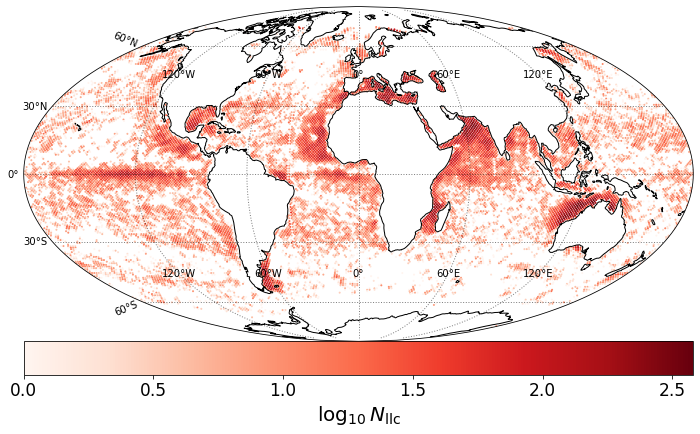

In [116]:
_ = ulmo_figs.show_spatial(highLL_LLC, lbl = 'llc')

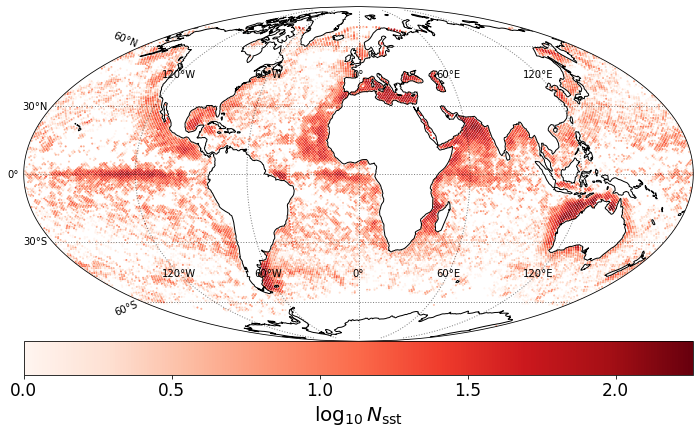

In [117]:
_ = ulmo_figs.show_spatial(highLL_SST, lbl = 'sst')

# Joint plot: no noise vs with noise

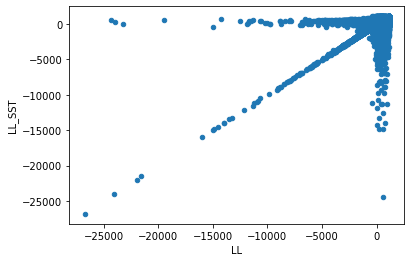

In [222]:
ax = llc_table.plot.scatter( x = 'LL', y = 'LL_SST')


In [235]:
table = llc_table[llc_table.LL < -10000]
table.shape

(34, 27)

In [236]:
table

,modis_lat,modis_lon,modis_col,modis_datetime,modis_LL,modis_row,clear_fraction,mean_temperature,Tmin,Tmax,...,pp_type,pp_idx,lat,lon,row,col,datetime,filename,LL,LL_SST
509,34.779440,-74.960340,751,2012-01-01 07:00:00,-1058.381592,1585,0.049988,19.431438,11.687000,24.421001,...,0,357830,34.742809,-74.968750,9819,15473,2012-01-01 12:00:00,s3://llc/ThetaUVSalt/LLC4320_2012-01-01T12_00_...,-11307.810547,-11559.152344
178302,-36.524548,-52.354084,549,2012-03-24 04:35:00,-87.226929,1008,0.026917,18.426132,12.075000,24.760000,...,0,10419,-36.523666,-52.343750,5842,16559,2012-03-24 00:00:00,s3://llc/ThetaUVSalt/LLC4320_2012-03-24T00_00_...,-10684.967773,362.637207
178312,-36.282940,-52.659554,517,2012-03-24 04:35:00,-429.456573,987,0.047119,16.848871,11.848000,24.228001,...,0,31493,-36.275986,-52.656250,5858,16544,2012-03-24 00:00:00,s3://llc/ThetaUVSalt/LLC4320_2012-03-24T00_00_...,-10606.058594,387.031250
225869,-35.840862,-51.868755,709,2012-04-16 04:40:00,-164.760559,1520,0.011902,17.460836,11.987000,23.823002,...,0,295302,-35.840759,-51.864582,5886,16582,2012-04-16 00:00:00,s3://llc/ThetaUVSalt/LLC4320_2012-04-16T00_00_...,-10707.437500,-10460.491211
380703,67.335594,-19.255129,395,2012-07-09 03:50:00,-261.095947,36,0.049988,1.967099,-1.527000,7.888000,...,0,541249,67.333153,-19.248066,12541,972,2012-07-09 00:00:00,s3://llc/ThetaUVSalt/LLC4320_2012-07-09T00_00_...,-13272.334961,-13277.722656
382772,67.037224,-19.642853,805,2012-07-10 04:30:00,-228.789215,1232,0.016052,2.094535,-1.512000,8.132000,...,0,79116,67.036652,-19.634607,12511,947,2012-07-10 00:00:00,s3://llc/ThetaUVSalt/LLC4320_2012-07-10T00_00_...,-10852.622070,-10860.276367
385650,66.892200,-19.345800,709,2012-07-12 04:20:00,-221.896362,336,0.031311,4.148958,-1.471001,9.106000,...,0,315516,66.892517,-19.356768,12492,956,2012-07-12 00:00:00,s3://llc/ThetaUVSalt/LLC4320_2012-07-12T00_00_...,-14482.408203,-14532.750977
432295,-36.052704,-50.670860,805,2012-08-06 04:40:00,-747.556885,1232,0.027649,14.959342,7.851000,19.739000,...,0,609575,-36.058659,-50.677082,5872,16639,2012-08-06 00:00:00,s3://llc/ThetaUVSalt/LLC4320_2012-08-06T00_00_...,-11715.017578,407.136108
432297,-36.002980,-51.055088,773,2012-08-06 04:40:00,-650.313110,1232,0.018250,12.518703,7.736000,19.686001,...,0,27557,-35.996460,-51.052082,5876,16621,2012-08-06 00:00:00,s3://llc/ThetaUVSalt/LLC4320_2012-08-06T00_00_...,-11806.220703,187.465820
432304,-35.718067,-50.981823,773,2012-08-06 04:40:00,-163.633728,1200,0.000610,13.140802,7.190000,19.730000,...,0,321739,-35.715992,-50.989582,5894,16624,2012-08-06 00:00:00,s3://llc/ThetaUVSalt/LLC4320_2012-08-06T00_00_...,-14293.568359,681.639038


<AxesSubplot:>

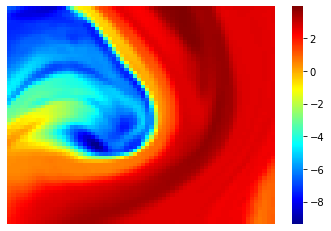

In [238]:
cutout = table.iloc[30]
img = image_utils.grab_image(cutout)
ulmo_plotting.show_image(img)

In [239]:
idx = cutout.pp_idx

In [ ]:
cutout

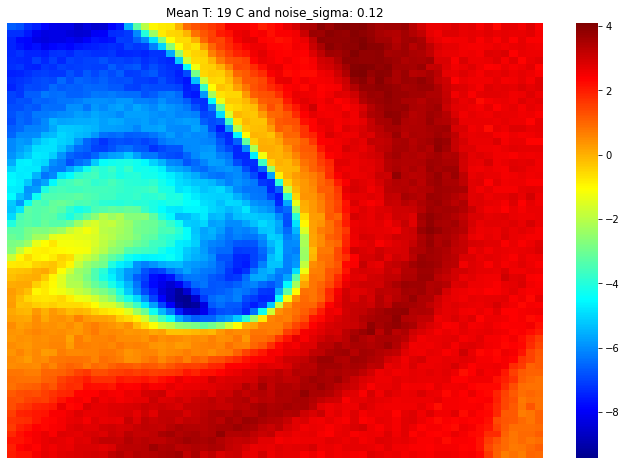

In [193]:
fig, ax = plt.subplots( figsize = (12,8) )

_, cm = ulmo_plotting.load_palette()

with h5py.File('/home/jovyan/ulmo/ulmo/notebooks/LLC_modis2012_test_SST_noise_preproc.h5', 'r') as pp_hf:
    tmp = float( pp_hf['valid_metadata'][idx,7].decode() ) 
    
    img = pp_hf['valid'][idx, 0, ...]
    g = sns.heatmap(np.flipud(img), xticklabels = [], yticklabels = [], cmap=cm, ax = ax)
    g.set_title('Mean T: {} C and noise_sigma: {}'.format(round(tmp), round(0.031 + 0.0048*tmp, 2)))


In [241]:
cutout.Tmax - cutout.Tmin

13.309000015258789

In [179]:
table1 = year_2012[year_2012.LL < -3000]
table1

,lat,lon,col,datetime,LL,row,clear_fraction,mean_temperature,Tmin,Tmax,T90,T10,filename,UID,pp_file,pp_root,field_size,pp_type,pp_idx
6609942,41.053577,-66.966280,485,2012-08-18 06:25:00,-3152.294922,173,0.048889,20.958961,15.839999,27.785000,26.349998,17.889999,AQUA_MODIS.20120818T062508.L2.SST.nc,1345131053611303372,s3://modis-l2/PreProc/MODIS_R2019_2012_95clear...,standard,128,0,64292
6610519,30.481964,-80.462166,1014,2012-01-20 07:35:00,-4125.907715,354,0.049011,20.201405,12.375000,25.910000,25.215000,15.014999,AQUA_MODIS.20120120T073508.L2.SST.nc,132712048209953783,s3://modis-l2/PreProc/MODIS_R2019_2012_95clear...,standard,128,0,64869
6615066,41.089390,-66.551575,517,2012-08-18 06:25:00,-3362.890137,163,0.049927,21.844509,15.839999,27.785000,26.389999,18.715000,AQUA_MODIS.20120818T062508.L2.SST.nc,1345131089411344842,s3://modis-l2/PreProc/MODIS_R2019_2012_95clear...,standard,128,0,69416
6653770,47.450430,-42.538660,243,2012-03-04 04:35:00,-3876.055908,1599,0.049866,8.097975,3.245000,13.264999,12.474999,4.395000,AQUA_MODIS.20120304T043507.L2.SST.nc,1330137450413746134,s3://modis-l2/PreProc/MODIS_R2019_2012_95clear...,standard,128,0,108120
6680905,-33.938250,-51.955032,645,2012-09-23 04:40:00,-3157.372803,880,0.032532,15.215066,11.130000,21.535000,20.135000,12.165000,AQUA_MODIS.20120923T044009.L2.SST.nc,134856061812804497,s3://modis-l2/PreProc/MODIS_R2019_2012_95clear...,standard,128,0,135255
6688061,-34.454403,-52.457317,613,2012-09-23 04:40:00,-3968.625732,944,0.041809,14.654272,10.760000,20.779999,18.639999,11.764999,AQUA_MODIS.20120923T044009.L2.SST.nc,134855545612754268,s3://modis-l2/PreProc/MODIS_R2019_2012_95clear...,standard,128,0,142411
6774843,-40.480717,18.654596,295,2012-08-07 23:35:00,-3765.053711,199,0.049988,12.404154,9.900000,19.205000,14.535967,11.384999,AQUA_MODIS.20120807T233508.L2.SST.nc,134449519319865460,s3://modis-l2/PreProc/MODIS_R2019_2012_95clear...,standard,128,0,229193
6869433,31.193806,-80.348020,1007,2012-01-20 07:35:00,-5924.471680,275,0.049988,18.615046,11.325000,25.910000,25.170000,13.005000,AQUA_MODIS.20120120T073508.L2.SST.nc,132712119389965198,s3://modis-l2/PreProc/MODIS_R2019_2012_95clear...,standard,128,0,323783
6913836,33.111000,-78.307950,358,2012-11-09 06:55:00,-3190.010498,1244,0.049500,21.906956,15.045000,27.269999,26.269999,17.410000,AQUA_MODIS.20121109T065509.L2.SST.nc,1352123111010169205,s3://modis-l2/PreProc/MODIS_R2019_2012_95clear...,standard,128,0,368186
7016402,30.941881,-80.430350,1007,2012-01-20 07:35:00,-4761.905273,304,0.046143,19.048092,11.415000,25.910000,25.219999,13.755000,AQUA_MODIS.20120120T073508.L2.SST.nc,132712094199956965,s3://modis-l2/PreProc/MODIS_R2019_2012_95clear...,standard,128,0,470752


<AxesSubplot:>

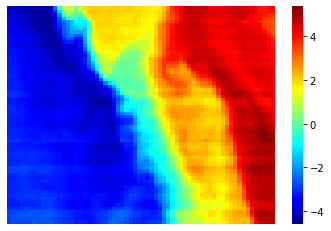

In [187]:
cutout1 = table1.iloc[19]
img = image_utils.grab_image(cutout1)
ulmo_plotting.show_image(img)

In [210]:
cutout1

lat                                                        -34.221027
lon                                                         -52.03197
col                                                               645
datetime                                          2012-09-23 04:40:00
LL                                                       -4482.027344
row                                                               912
clear_fraction                                               0.047119
mean_temperature                                             15.81085
Tmin                                                            11.13
Tmax                                                           21.535
T90                                                            20.305
T10                                                            12.025
filename                         AQUA_MODIS.20120923T044009.L2.SST.nc
UID                                                134855779012796803
pp_file             

In [214]:
table2 = llc_table1[llc_table1.LL < -10000]
table2.iloc[0]

modis_lat                                                    34.77944
modis_lon                                                   -74.96034
modis_col                                                         751
modis_datetime                                    2012-01-01 07:00:00
modis_LL                                                 -1058.381592
modis_row                                                        1585
clear_fraction                                               0.049988
mean_temperature                                            19.431719
Tmin                                                           11.687
Tmax                                                        24.421001
T90                                                         24.257999
T10                                                            12.717
modis_filename                   AQUA_MODIS.20120101T070008.L2.SST.nc
modis_UID                                         1325124779410503966
pp_file             

In [215]:
table3 = llc_table1[llc_table1.modis_UID == 135155811213061895]
table3

,modis_lat,modis_lon,modis_col,modis_datetime,modis_LL,modis_row,clear_fraction,mean_temperature,Tmin,Tmax,...,field_size,pp_type,pp_idx,lat,lon,row,col,datetime,filename,LL
613901,-34.18877,-49.381054,741,2012-11-03 04:35:00,-14.818787,400,0.000061,19.102835,9.746,23.055,...,64,0,610393,-34.188572,-49.385418,5991,16701,2012-11-03,s3://llc/ThetaUVSalt/LLC4320_2012-11-03T00_00_...,-11921.091797


<AxesSubplot:>

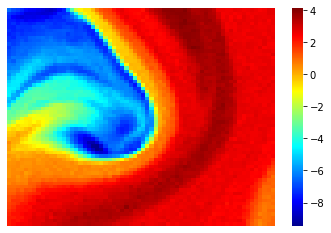

In [216]:
cutout2= table3.iloc[0]
img = image_utils.grab_image(cutout2)
ulmo_plotting.show_image(img)

In [217]:
cutout2

modis_lat                                                   -34.18877
modis_lon                                                  -49.381054
modis_col                                                         741
modis_datetime                                    2012-11-03 04:35:00
modis_LL                                                   -14.818787
modis_row                                                         400
clear_fraction                                               0.000061
mean_temperature                                            19.102835
Tmin                                                            9.746
Tmax                                                           23.055
T90                                                         22.542999
T10                                                            12.667
modis_filename                   AQUA_MODIS.20121103T043509.L2.SST.nc
modis_UID                                          135155811213061895
pp_file             

In [227]:
year_2012.head()

,lat,lon,col,datetime,LL,row,clear_fraction,mean_temperature,Tmin,Tmax,T90,T10,filename,UID,pp_file,pp_root,field_size,pp_type,pp_idx
5854570,36.135740,-3.848738,453,2012-01-01 02:05:00,318.187195,816,0.024536,15.801380,14.620000,16.594999,16.205000,15.304999,AQUA_MODIS.20120101T020508.L2.SST.nc,1325126135717615126,s3://modis-l2/PreProc/MODIS_R2019_2011_95clear...,standard,128,0,41054
5864483,35.531757,-7.622594,197,2012-01-01 02:05:00,125.284912,930,0.049194,17.166348,14.980000,18.029999,17.559999,16.764999,AQUA_MODIS.20120101T020508.L2.SST.nc,1325125531817237741,s3://modis-l2/PreProc/MODIS_R2019_2011_95clear...,standard,128,0,50967
5869390,35.672420,-2.118561,613,2012-01-01 02:05:00,348.785034,840,0.049011,16.115070,15.134999,16.645000,16.350000,15.844999,AQUA_MODIS.20120101T020508.L2.SST.nc,1325125672417788144,s3://modis-l2/PreProc/MODIS_R2019_2011_95clear...,standard,128,0,55874
5881776,35.769630,-3.190676,517,2012-01-01 02:05:00,313.916565,846,0.047546,15.890429,14.580000,16.625000,16.205000,15.594999,AQUA_MODIS.20120101T020508.L2.SST.nc,1325125769617680932,s3://modis-l2/PreProc/MODIS_R2019_2011_95clear...,standard,128,0,68260
5889532,36.795265,-1.164854,667,2012-01-01 02:05:00,130.362183,703,0.048706,15.823463,14.855000,16.984999,16.324999,15.380000,AQUA_MODIS.20120101T020508.L2.SST.nc,1325126795317883515,s3://modis-l2/PreProc/MODIS_R2019_2011_95clear...,standard,128,0,76016


In [231]:
np.max( year_2012.DT)

12.164999961853027

In [234]:
np.max( year_2012.DT_abs)

16.375000000000004